<a href="https://colab.research.google.com/github/ChristalL99/ECON211_DecisionTree/blob/main/Economy_HappinessScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [24]:
df=pd.read_csv('data.csv')
df

,Economy (GDP per Capita),Happiness Score
0,1.39651,7.587
1,1.30232,7.561
2,1.32548,7.527
3,1.45900,7.522
4,1.32629,7.427
...,...,...
777,0.35900,3.334
778,0.47600,3.231
779,0.35000,3.203
780,0.02600,3.083


In [25]:
df['Happiness Score']=df["Happiness Score"].apply(lambda x: 'High' if x>=6 else 'Low' if x<=4.5 else 'Average')
df

,Economy (GDP per Capita),Happiness Score
0,1.39651,High
1,1.30232,High
2,1.32548,High
3,1.45900,High
4,1.32629,High
...,...,...
777,0.35900,Low
778,0.47600,Low
779,0.35000,Low
780,0.02600,Low


In [26]:
feature_names=['Economy (GDP per Capita)']
features=df[feature_names]
targets=df['Happiness Score']
targets_names = targets.unique()

In [27]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [38]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.64


In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

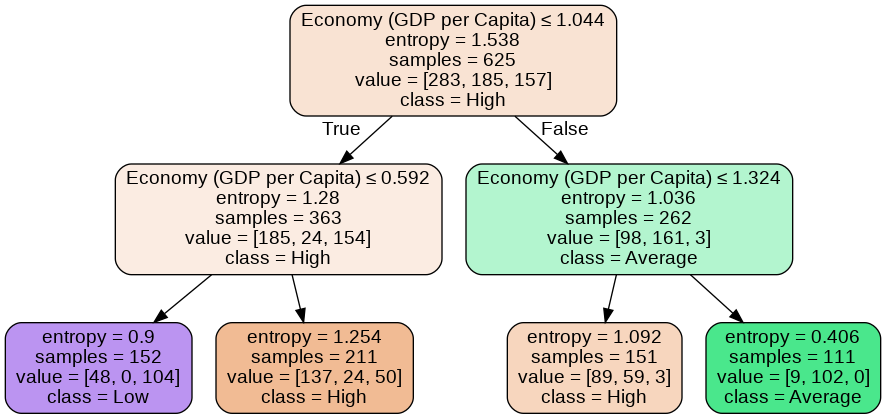

In [40]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=targets_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ESG.png')
Image(graph.create_png())